## Feature Engineering/Exploratory Data Analysis/Machine Learning

In this note I will be conducting feature engineering and exploratory data analysis operations on the cleaned terrorism dataset for the purpose of preparing the data for supervised machine learning.

The goal of the machine learning task is to train a model that can predict the of a terrorist attack.

### FE & EDA

Imports for data analysis and visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
plt.style.use("fivethirtyeight")

Import data, designate `eventid` column as index and view basic info on it

In [3]:
df = pd.read_csv("clean_data.csv", index_col=[0])

In [4]:
df.set_index("eventid", inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130107 entries, 197001000001 to 201701270001
Data columns (total 51 columns):
iyear               130107 non-null int64
imonth              130107 non-null int64
iday                130107 non-null int64
extended            130107 non-null int64
country             130107 non-null int64
country_txt         130107 non-null object
region              130107 non-null int64
region_txt          130107 non-null object
vicinity            130107 non-null int64
crit1               130107 non-null int64
crit2               130107 non-null int64
crit3               130107 non-null int64
doubtterr           130107 non-null int64
multiple            130107 non-null int64
success             130107 non-null int64
suicide             130107 non-null int64
attacktype1         130107 non-null int64
attacktype1_txt     130107 non-null object
targtype1           130107 non-null int64
targtype1_txt       130107 non-null object
gname               130107 n

View number of unique values in `country_txt`

In [6]:
df.country_txt.nunique()

184

View the countries the countries with the most terrorism acts in descending order

In [7]:
df.country_txt.value_counts().head()

Iraq           19609
Pakistan       12132
Afghanistan     9704
India           9621
Colombia        6727
Name: country_txt, dtype: int64

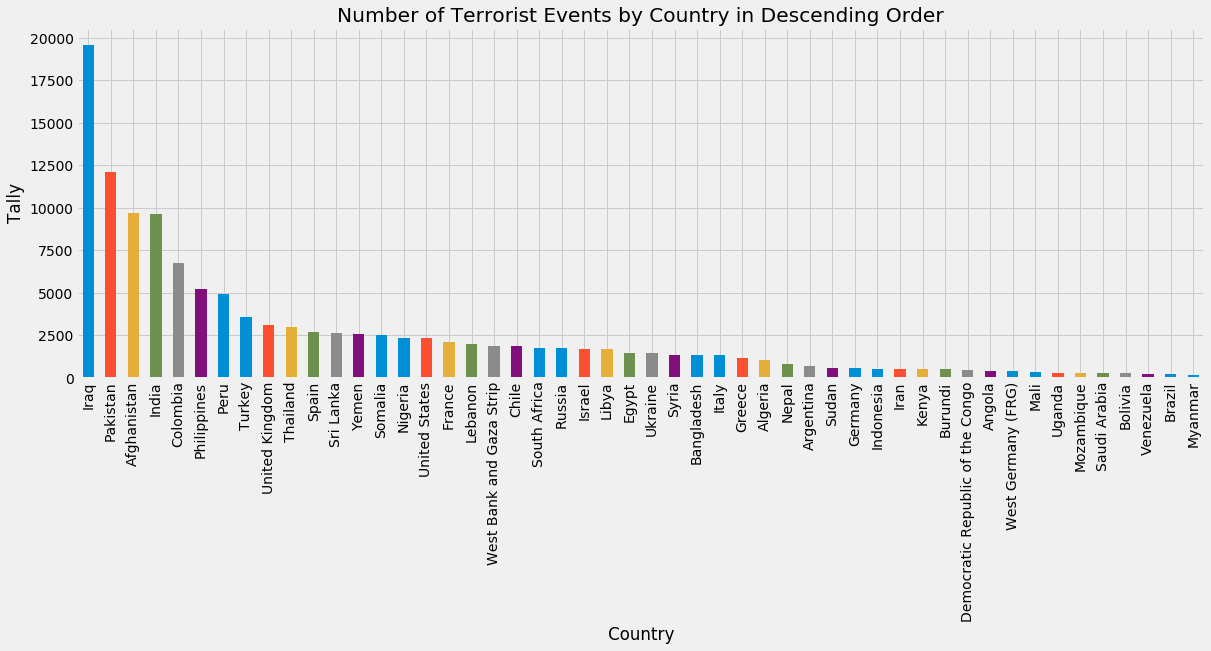

In [9]:
df.country_txt.value_counts().iloc[:50].plot(kind = "bar", figsize = (18, 6))
plt.title("Number of Terrorist Events by Country in Descending Order")
plt.xlabel("Country")
plt.ylabel("Tally");

Line plot of the number terrorist events from 1970 to 2017

Text(0,0.5,'Number of Events')

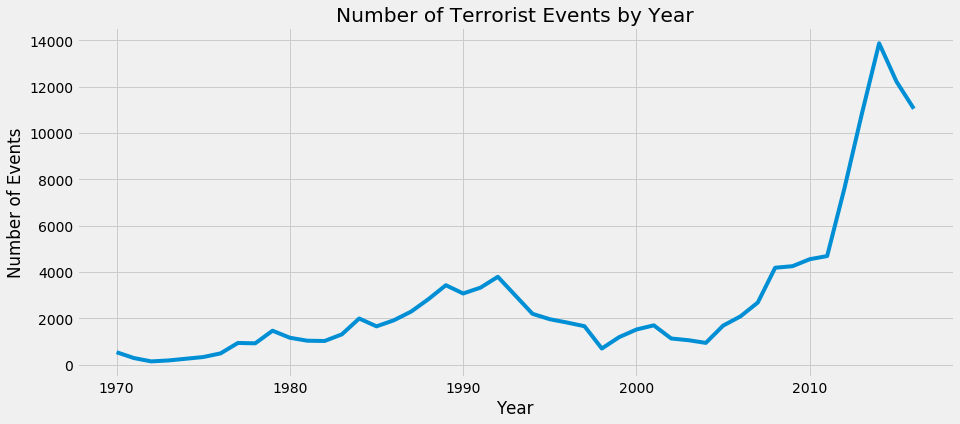

In [9]:
df.iyear.value_counts().sort_index().plot(figsize=(14, 6))
plt.title("Number of Terrorist Events by Year")
plt.xlabel("Year")
plt.ylabel("Number of Events")

View counts of values in `extended` column

In [10]:
df.extended.value_counts(normalize=True)

0    0.966797
1    0.033203
Name: extended, dtype: float64

Bar plot of the counts of terrorism acts by region

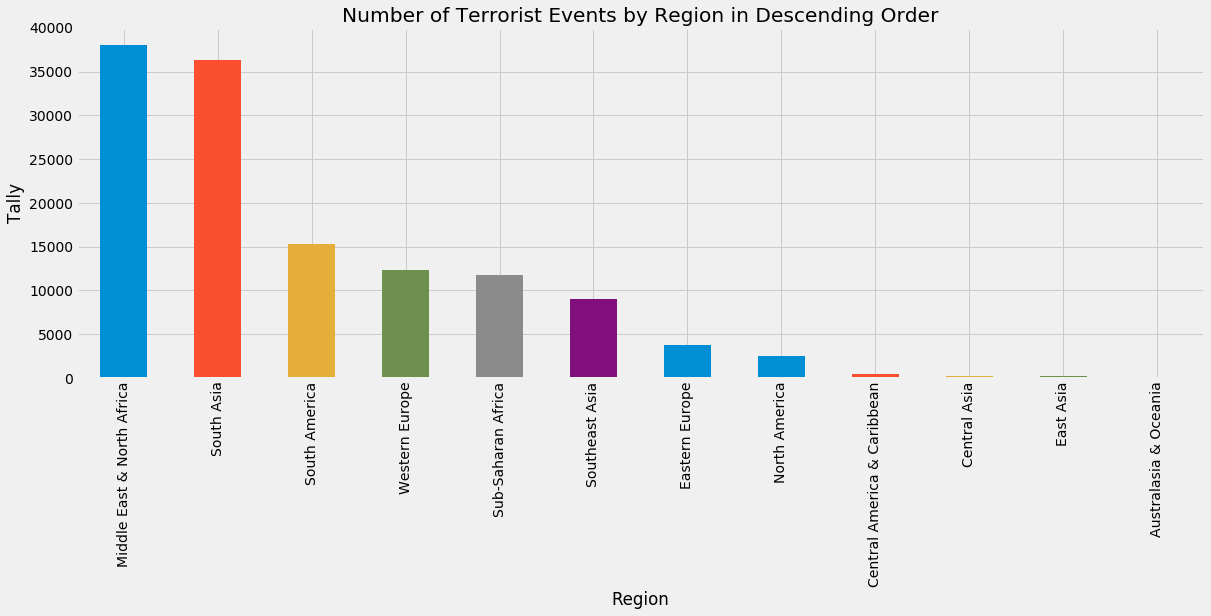

In [11]:
df.region_txt.value_counts().plot(kind = "bar", figsize = (18, 6))
plt.title("Number of Terrorist Events by Region in Descending Order")
plt.xlabel("Region")
plt.ylabel("Tally");


Display counts of values in `vicinity`, `crit1`, `crit2`, and  `crit3` features

In [12]:
df.vicinity.value_counts(normalize=True)

 0    0.925792
 1    0.073978
-9    0.000231
Name: vicinity, dtype: float64

In [13]:
df.crit1.value_counts()

1    128581
0      1526
Name: crit1, dtype: int64

In [14]:
df.crit2.value_counts()

1    129209
0       898
Name: crit2, dtype: int64

In [15]:
df.crit3.value_counts()

1    115761
0     14346
Name: crit3, dtype: int64

View the overlapping data among `crit1`, `crit2`, and  `crit3` features

In [16]:
pd.crosstab(df.crit1, df.crit2)

crit2,0,1
crit1,,
0,0,1526
1,898,127683


In [17]:
pd.crosstab(df.crit1, df.crit3)

crit3,0,1
crit1,,
0,0,1526
1,14346,114235


In [18]:
pd.crosstab(df.crit2, df.crit3)

crit3,0,1
crit2,,
0,0,898
1,14346,114863


View counts of values in `doubtterr` and `success` features

In [19]:
df.doubtterr.value_counts()

 0    102678
 1     19193
-9      8236
Name: doubtterr, dtype: int64

In [20]:
df.success.value_counts()

1    117303
0     12804
Name: success, dtype: int64

Plots of the distribution of terrorist events by region for successful and unsuccessful terrorist attacks

Text(0,0.5,'Percentage')

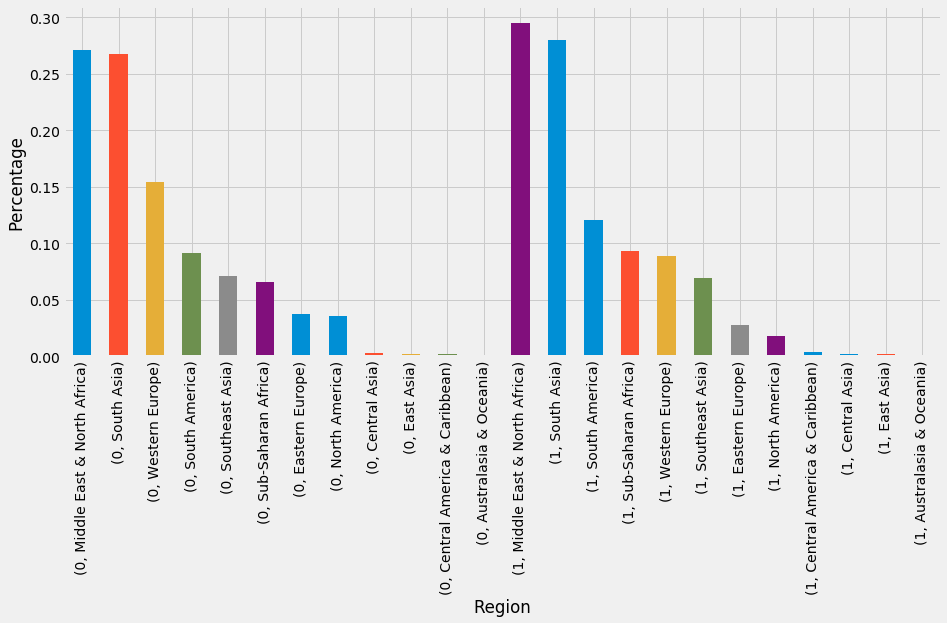

In [21]:
df.groupby("success").region_txt.value_counts(normalize=True).plot(kind = "bar", figsize = (14, 6))
plt.xlabel("Region")
plt.ylabel("Percentage")


Pie chart of values in `suicide`

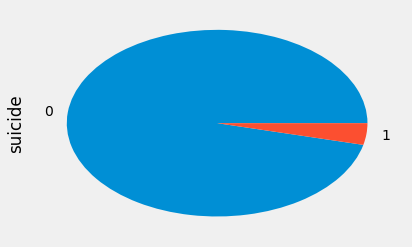

In [22]:
df.suicide.value_counts().plot(kind = "pie")

Bar plot of values in `attacktype1`

Text(0,0.5,'Tally')

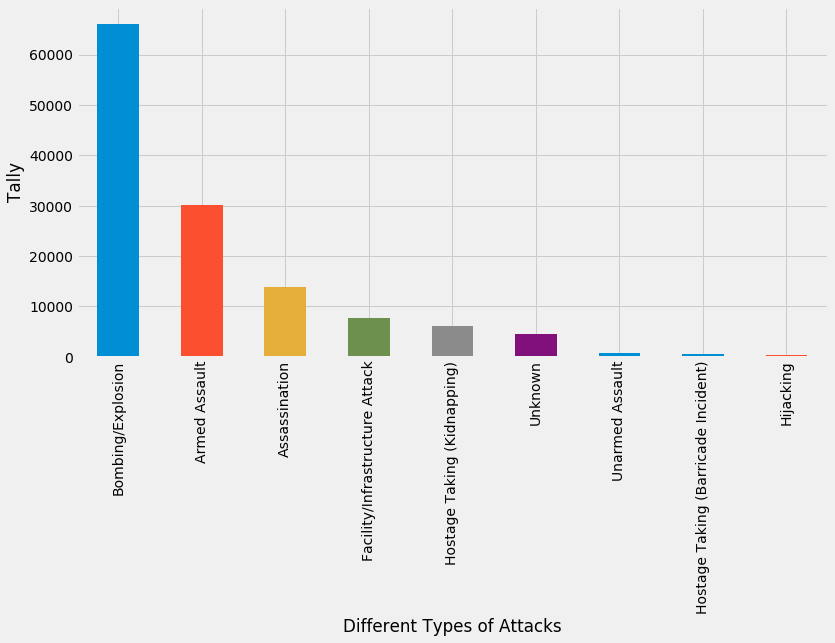

In [25]:
df.attacktype1_txt.value_counts().plot(kind = "bar", figsize= (12, 6))
plt.xlabel("Different Types of Attacks")
plt.ylabel("Tally")

Normalized version

Text(0,0.5,'Percentage')

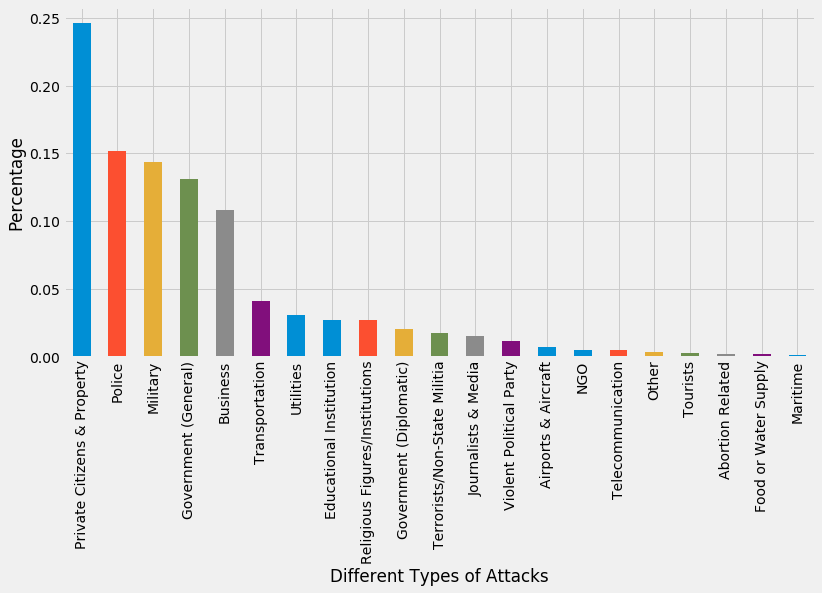

In [26]:
df.targtype1_txt.value_counts(normalize=True).plot(kind="bar", figsize = (12, 6))
plt.xlabel("Different Types of Attacks")
plt.ylabel("Percentage")

Pie chart of values in `individual` feature

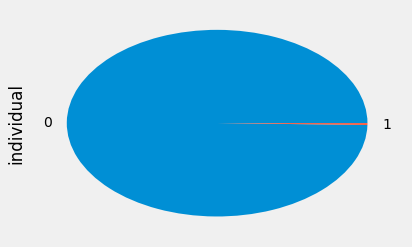

In [27]:
df.individual.value_counts().plot(kind = "pie")

Drop `individual` 

In [28]:
df.drop("individual", axis = 1, inplace=True)

View the value counts for an assortment of features

In [29]:
df.weaptype1_txt.value_counts()

Explosives/Bombs/Dynamite                                                      69528
Firearms                                                                       40362
Unknown                                                                         8753
Incendiary                                                                      8322
Melee                                                                           2555
Chemical                                                                         229
Sabotage Equipment                                                               104
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      101
Other                                                                             91
Biological                                                                        28
Fake Weapons                                                                      21
Radiological                                                     

In [30]:
df.property.value_counts()

 1    67313
 0    46186
-9    16608
Name: property, dtype: int64

In [31]:
df.dbsource.value_counts()

START Primary Collection                    56578
PGIS                                        40522
ISVG                                        15882
CETIS                                       13485
UMD Schmid 2012                              1006
Hewitt Project                                767
UMD Algeria 2010-2012                         420
UMD Sri Lanka 2011                            365
UMD South Africa                              352
Anti-Abortion Project 2010                    186
Eco Project 2010                              141
UMD JTMM Nepal 2012                            89
UMD Miscellaneous                              73
HSI                                            70
Hijacking DB                                   43
UMD Encyclopedia of World Terrorism 2012       30
Hyland                                         20
CBRN Global Chronology                         17
State Department 1997 Document                 16
Armenian Website                               12


In [32]:
df.INT_LOG.value_counts()

-9    68958
 0    56124
 1     5025
Name: INT_LOG, dtype: int64

In [33]:
df.ransom.value_counts()

-9.0    83156
 0.0    46246
 1.0      705
Name: ransom, dtype: int64

Plot the distribution of the `nperps` feature

(0, 200)

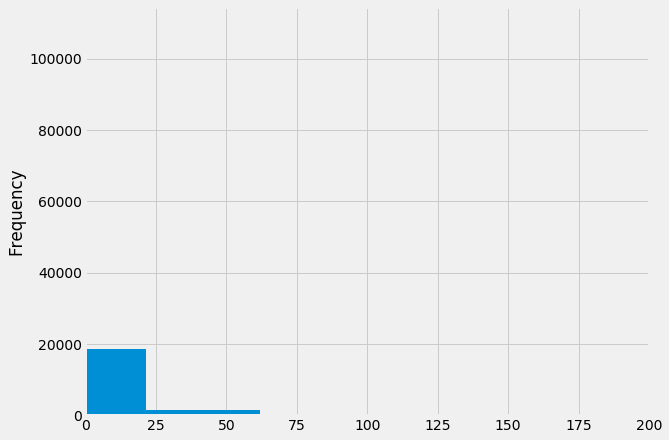

In [34]:
df.nperps.plot(kind = "hist", figsize = (9, 7), bins = 500)
plt.xlim(0, 200)

Dropping `weapdetails` because it's superflous, already have weapontype.

In [35]:
df.drop("weapdetail", axis = 1, inplace=True)

Replace values of `unknown` with `Unknown` so as to combine both

In [36]:
df.corp1 = df.corp1.replace(to_replace="unknown", value="Unknown")

Drop `weapsubtype` because its unneccessary

In [37]:
df.drop("weapsubtype1", axis = 1, inplace=True)

Bar chart of `nwound` sorted by least to greatest

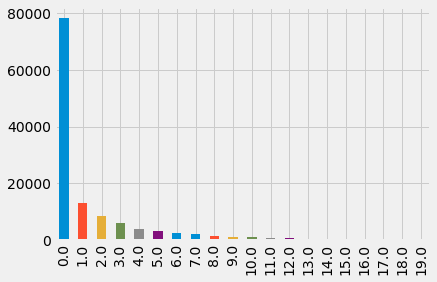

In [42]:
df.nwound.value_counts().sort_index().iloc[:20].plot(kind = "bar")

Drop `provstate` because there is already a region variable

In [38]:
df.drop("provstate", axis = 1, inplace=True)

Bar chart of `nkill` sorted by least to greatest

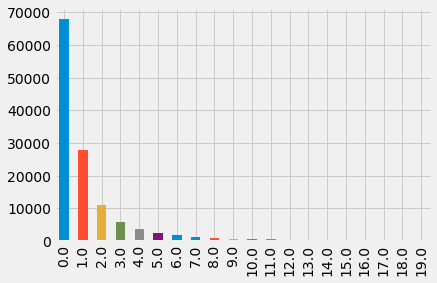

In [39]:
df.nkill.value_counts().sort_index().iloc[:20].plot(kind = "bar")

Drop `targesubtype` and `targsubtype1_txt` because there is already a target type variable

In [40]:
df.drop(["targsubtype1_txt", "targsubtype1"], axis =1 , inplace=True)

Scatter plot of the locations of terrorist attacks all around the world

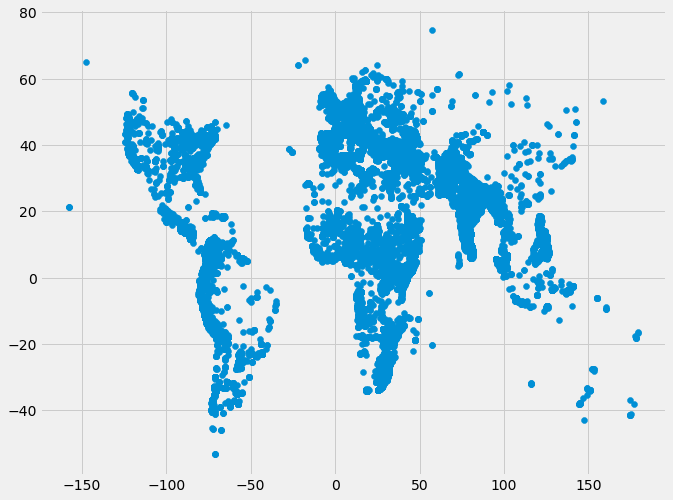

In [41]:
plt.figure(figsize=(10, 8))
plt.scatter(df.longitude, df.latitude)

In [51]:
df.city.value_counts().shape

(26480,)

Drop `city` because it is too specific

In [42]:
df.drop(["city"], axis = 1, inplace=True)

View counts of values in specificity

In [43]:
df.specificity.value_counts()

1.0    106774
3.0     11211
4.0      6118
2.0      6004
Name: specificity, dtype: int64

Dropping these columns because I've decided that they are unneccessary. I consulted the codebook in my decision here.

In [44]:
drop_cols = ["attacktype1", "country", "country_txt", "region", "weaptype1", "natlty1", "targtype1"]

df.drop(drop_cols, axis = 1, inplace=True)

In [45]:
df.drop(["imonth", "iday"], axis = 1, inplace=True)

Separating the data into two different dataframes, one of numerical types and one object types

In [47]:
obj_cols = df.dtypes[df.dtypes == object].index.tolist()
num_cols = df.dtypes[df.dtypes != object].index.tolist()

df_obj = df[obj_cols].copy()
df_num = df[num_cols].copy()

Dropping `gname` from `df_obj` because it is the target variable and is unneccesary for the next step which involves preprocessing the categorical data

In [48]:
df_obj.drop("gname", axis = 1, inplace=True)

In this step I'm making dummy variables from all the categorial data and concatenating them together

In [55]:
df_obj.columns

Index(['region_txt', 'attacktype1_txt', 'targtype1_txt', 'weaptype1_txt',
       'dbsource', 'natlty1_txt'],
      dtype='object')

In [57]:
region_dums = pd.get_dummies(df_obj.region_txt, prefix="region")

attacktype_dums = pd.get_dummies(df_obj.attacktype1_txt, prefix="attacktype")

targtype_dums = pd.get_dummies(df_obj.targtype1_txt, prefix="targettype")

weapontype_dums = pd.get_dummies(df_obj.weaptype1_txt, prefix="weapontype")


dbsource_dums = pd.get_dummies(df_obj.dbsource, prefix="dbsource")


corp_dums = pd.get_dummies(df_obj.corp1, prefix="corp")

In [50]:
corp_dums.shape

(130107, 25678)

Drop `corp`  because there are too many unique variables

In [51]:
df_obj.drop("corp1", axis = 1, inplace=True)

In [52]:
del corp_dums

In [58]:
nat_dums = pd.get_dummies(df_obj.natlty1_txt, prefix="nat")

In [59]:
nat_dums.shape

(130107, 200)

Dropping target1 because of too many unique variables

In [53]:
df_obj.target1.nunique()

65550

In [54]:
df_obj.drop("target1", axis = 1, inplace=True)

Combine all dummy variables into one dataframe

In [60]:
dummies = pd.concat([region_dums, attacktype_dums, weapontype_dums, dbsource_dums, nat_dums], axis = 1)

In [61]:
dummies.shape

(130107, 258)

In [62]:
df_num.shape

(130107, 26)

Combine the dataframe of dummy variables with the numerical dataframe

In [69]:
data = pd.concat([df_num, dummies], axis =1 )

### Machine Learning

Data is a clean machine learning ready dataset. All numeric values and no nulls.

Plan is to use the features in `data` to predict the terrorist who committed act

In [64]:
#Assign target variable
y = df.gname

View distribution of values in target variable

In [65]:
y.value_counts()

Unknown                                            62336
Taliban                                             5750
Shining Path (SL)                                   3635
Islamic State of Iraq and the Levant (ISIL)         3455
Revolutionary Armed Forces of Colombia (FARC)       2062
New People's Army (NPA)                             1958
Kurdistan Workers' Party (PKK)                      1904
Al-Shabaab                                          1872
Basque Fatherland and Freedom (ETA)                 1717
Communist Party of India - Maoist (CPI-Maoist)      1656
Irish Republican Army (IRA)                         1582
Liberation Tigers of Tamil Eelam (LTTE)             1421
Boko Haram                                          1407
National Liberation Army of Colombia (ELN)          1241
Maoists                                             1223
Tehrik-i-Taliban Pakistan (TTP)                     1180
Palestinians                                         887
Al-Qaida in the Arabian Peninsu

Since there are too many unique classes in the target variable, so I'm going to filter it down to the 20 most common classes that are not unknown.

In [66]:
top20_terroristgroups = y.value_counts().iloc[1:21].index
top20_terroristgroups

Index(['Taliban', 'Shining Path (SL)',
       'Islamic State of Iraq and the Levant (ISIL)',
       'Revolutionary Armed Forces of Colombia (FARC)',
       'New People's Army (NPA)', 'Kurdistan Workers' Party (PKK)',
       'Al-Shabaab', 'Basque Fatherland and Freedom (ETA)',
       'Communist Party of India - Maoist (CPI-Maoist)',
       'Irish Republican Army (IRA)',
       'Liberation Tigers of Tamil Eelam (LTTE)', 'Boko Haram',
       'National Liberation Army of Colombia (ELN)', 'Maoists',
       'Tehrik-i-Taliban Pakistan (TTP)', 'Palestinians',
       'Al-Qaida in the Arabian Peninsula (AQAP)',
       'Manuel Rodriguez Patriotic Front (FPMR)',
       'Houthi extremists (Ansar Allah)', 'Sikh Extremists'],
      dtype='object')

Now I need to filter the rows in the data variable to only return events committed by groups in the top 20 perpetrators of terrorism

In [67]:
y = y[y.isin(top20_terroristgroups)].copy()

In [70]:
data = data.loc[df[df.gname.isin(top20_terroristgroups)].index].copy()

View new dimensions of data

In [72]:
data.shape

(35820, 284)

Import Machine Learning tools

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, log_loss, confusion_matrix
from sklearn.neural_network import MLPClassifier

Determine the null accuracy for the target variable

In [73]:
y.value_counts(normalize=True).max()

0.1605248464544947

Make of copy of `data` to use to train models

In [80]:
X = data.copy()

Modeling with logistic regression

In [81]:
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Training score

In [82]:
lr.score(X, y)

0.9631769960915689

Make a train test split, fit model on training data and evaluate it on the testing data

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)

In [84]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9633724176437745

Testing score indicates that there isn't any overfitting. But I need to cross validate to confirm.

In [85]:
cross_val_score(LogisticRegression(), X, y, cv = 5, scoring = "accuracy").mean()

0.9241634020707608

In [86]:
cross_val_score(LogisticRegression(), X, y, cv = 5, scoring = "neg_log_loss").mean()

-0.31211107781882663

The cross validated accuracy is lower than my training score so there is some overfiting but it is significantly higher than my null accuracy, which means I have a very good model

Make predictions on my test set

In [88]:
preds = lr.predict(X_test)

Create a confusion matrix of the labels of my testing data and its predictions for the purpose of getting a more granular look at the predictions

In [89]:
#Confusion matrix
pd.crosstab(y_test, preds)

col_0,Al-Qaida in the Arabian Peninsula (AQAP),Al-Shabaab,Basque Fatherland and Freedom (ETA),Boko Haram,Communist Party of India - Maoist (CPI-Maoist),Houthi extremists (Ansar Allah),Irish Republican Army (IRA),Islamic State of Iraq and the Levant (ISIL),Kurdistan Workers' Party (PKK),Liberation Tigers of Tamil Eelam (LTTE),Manuel Rodriguez Patriotic Front (FPMR),Maoists,National Liberation Army of Colombia (ELN),New People's Army (NPA),Palestinians,Revolutionary Armed Forces of Colombia (FARC),Shining Path (SL),Sikh Extremists,Taliban,Tehrik-i-Taliban Pakistan (TTP)
gname,,,,,,,,,,,,,,,,,,,,
Al-Qaida in the Arabian Peninsula (AQAP),206,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Al-Shabaab,0,485,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Basque Fatherland and Freedom (ETA),0,0,407,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Boko Haram,0,1,0,352,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Communist Party of India - Maoist (CPI-Maoist),0,0,0,0,405,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
Houthi extremists (Ansar Allah),12,0,0,0,0,157,0,6,0,0,0,0,0,0,0,0,0,0,0,0
Irish Republican Army (IRA),0,0,1,0,0,0,392,1,0,0,0,0,0,0,0,0,0,0,0,0
Islamic State of Iraq and the Levant (ISIL),1,1,0,0,0,0,1,856,11,0,0,0,0,3,1,0,0,0,0,0
Kurdistan Workers' Party (PKK),0,0,2,0,0,0,0,3,453,0,0,0,0,0,0,0,0,0,0,0


Visualize the confusion in a heatmap

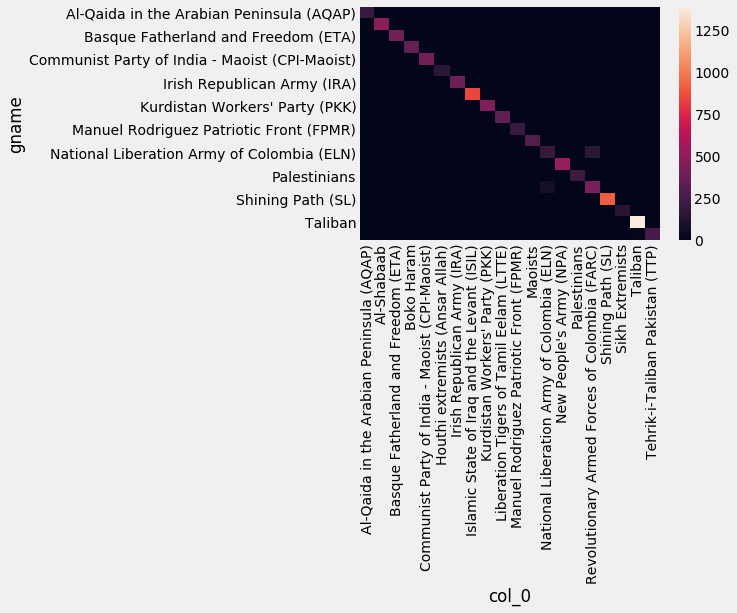

In [90]:
sns.heatmap(pd.crosstab(y_test, preds))

Find the terrorist groups the model is best and worst at classifying.

In [91]:
cm = pd.crosstab(y_test, preds)
cm.shape

(20, 20)

In [115]:
digit_accuracy_dict = {}


for col in cm.columns:
    tp = cm.loc[col, col]
    tn = cm.drop(col).drop(col, axis = 1).sum().sum()
    indices = [e for e in cm.columns if e != col]
    fp = cm.loc[indices, col].sum()
    fn = cm.loc[col, indices].sum()
    acc_score = (tp + tn)/float(tp + tn + fp + fn)
    digit_accuracy_dict[col] = acc_score
    
sorted(digit_accuracy_dict.items(), key= lambda x:x[1], reverse = True)

[('Maoists', 1.0),
 ('Basque Fatherland and Freedom (ETA)', 0.9998883305415969),
 ('Manuel Rodriguez Patriotic Front (FPMR)', 0.9997766610831937),
 ("New People's Army (NPA)", 0.9997766610831937),
 ('Boko Haram', 0.9996649916247906),
 ('Communist Party of India - Maoist (CPI-Maoist)', 0.9996649916247906),
 ('Sikh Extremists', 0.9996649916247906),
 ('Al-Shabaab', 0.9995533221663875),
 ('Irish Republican Army (IRA)', 0.9993299832495812),
 ('Liberation Tigers of Tamil Eelam (LTTE)', 0.9992183137911781),
 ('Shining Path (SL)', 0.999106644332775),
 ("Kurdistan Workers' Party (PKK)", 0.9985482970407593),
 ('Palestinians', 0.9985482970407593),
 ('Al-Qaida in the Arabian Peninsula (AQAP)', 0.9972082635399219),
 ('Islamic State of Iraq and the Levant (ISIL)', 0.9970965940815187),
 ('Houthi extremists (Ansar Allah)', 0.9964265773311),
 ('Tehrik-i-Taliban Pakistan (TTP)', 0.995644891122278),
 ('Taliban', 0.9954215522054718),
 ('National Liberation Army of Colombia (ELN)', 0.9778894472361809),
 ('

Model classifies Maoists with 100% accuracy. The two worst groups at being classified are both Colombian

Find out the most common wrong prediction for each terrorist group.

In [92]:
pred_df = pd.DataFrame(list(zip(y_test.values, preds)), columns=["actual", "predictions"])

In [93]:
d = {}
for i in pred_df.actual.unique():
    v = pred_df[pred_df.actual== i].predictions.value_counts().index[:2].tolist()
    for e in v:
        if e != i:
            d[i] = e

In [94]:
d

{'Al-Qaida in the Arabian Peninsula (AQAP)': 'Islamic State of Iraq and the Levant (ISIL)',
 'Basque Fatherland and Freedom (ETA)': 'Islamic State of Iraq and the Levant (ISIL)',
 'Boko Haram': 'Al-Shabaab',
 'Communist Party of India - Maoist (CPI-Maoist)': 'Taliban',
 'Houthi extremists (Ansar Allah)': 'Al-Qaida in the Arabian Peninsula (AQAP)',
 'Irish Republican Army (IRA)': 'Islamic State of Iraq and the Levant (ISIL)',
 'Islamic State of Iraq and the Levant (ISIL)': "Kurdistan Workers' Party (PKK)",
 "Kurdistan Workers' Party (PKK)": 'Islamic State of Iraq and the Levant (ISIL)',
 'Liberation Tigers of Tamil Eelam (LTTE)': 'Communist Party of India - Maoist (CPI-Maoist)',
 'National Liberation Army of Colombia (ELN)': 'Revolutionary Armed Forces of Colombia (FARC)',
 "New People's Army (NPA)": 'Liberation Tigers of Tamil Eelam (LTTE)',
 'Palestinians': 'Islamic State of Iraq and the Levant (ISIL)',
 'Revolutionary Armed Forces of Colombia (FARC)': 'National Liberation Army of Col

Dictionary represents the relationship between terrorist group and the most common group the model misidentifiies it as.

Logistic Regression with Truncated SVD. I'm experimenting with Truncated SVD because of the sparse nature of the data.

In [95]:
trun = TruncatedSVD(n_components=X.shape[1]- 1)

In [96]:
Xt = trun.fit_transform(X)

Explained Variance Ratio Plot for the Truncated SVD Components

Text(0,0.5,'Explained Varianced')

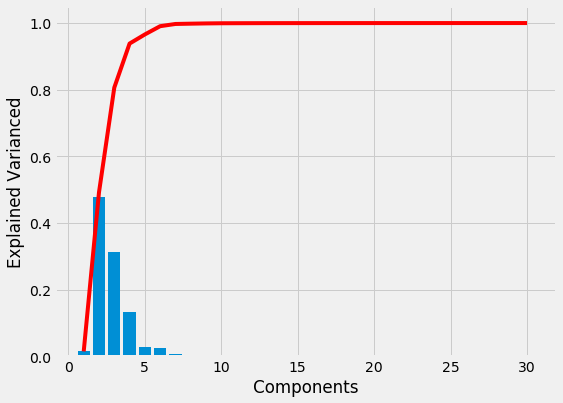

In [171]:
plt.figure(figsize=(8, 6))

components = range(1, 31)

plt.bar(components, trun.explained_variance_ratio_[:30], label = "Explained Variance Ratio")
plt.plot(components, np.cumsum(trun.explained_variance_ratio_[:30]), c = "r", label = "Cumulative Sum of Explained Variance ratios")
plt.xlabel("Components")
plt.ylabel("Explained Varianced")

Fit and evaluate model with 5 components in TSVD

In [98]:
trun5 = TruncatedSVD(n_components=5)
Xt5 = trun5.fit_transform(X)

In [99]:
lr_trun5 = LogisticRegression()
lr_trun5.fit(Xt5, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [100]:
lr_trun5.score(Xt5, y)

0.7503070910106086

In [101]:
cross_val_score(LogisticRegression(), Xt5, y, cv = 5, scoring = "accuracy").mean()

0.712582139228801

TSVD returns much worse results, so I'm discontinuing its use.

Modeling with decision tree

In [102]:
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [103]:
dt.score(X, y)

0.7682579564489113

In [104]:
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.7937465103294249

Interestingly enough the decision tree testing score is higher than its training score.

Use grid searching the tune the `max_depth` parameter

In [183]:
depths = list(range(5, 205, 5))

params = {"max_depth":depths}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv = 5, scoring="accuracy")

grid.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [184]:
grid.best_params_

{'max_depth': 55}

In [185]:
grid.best_score_

0.9152987158012283

Decision Tree model with the best `max_depth` value is 55 which produces a cv accuracy score of 91.5%

Fit a decision tree with `max_depth` = 55 for the purpose of examining the feature importance scores

In [186]:
dt = DecisionTreeClassifier(max_depth=55)
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=55,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [187]:
feat_imp = list(zip(X.columns, dt.feature_importances_))

In [188]:
df_fi = pd.DataFrame(feat_imp, columns=["features", "scores"])

In [191]:
df_fi.sort_values(by="scores", ascending=False).head(10)

,features,scores
21,longitude,0.195157
84,nat_Afghanistan,0.136063
22,latitude,0.105956
220,nat_Peru,0.099114
164,nat_Iraq,0.080909
264,nat_Turkey,0.051955
36,region_Sub-Saharan Africa,0.048441
37,region_Western Europe,0.047784
118,nat_Colombia,0.046722
11,INT_LOG,0.043701


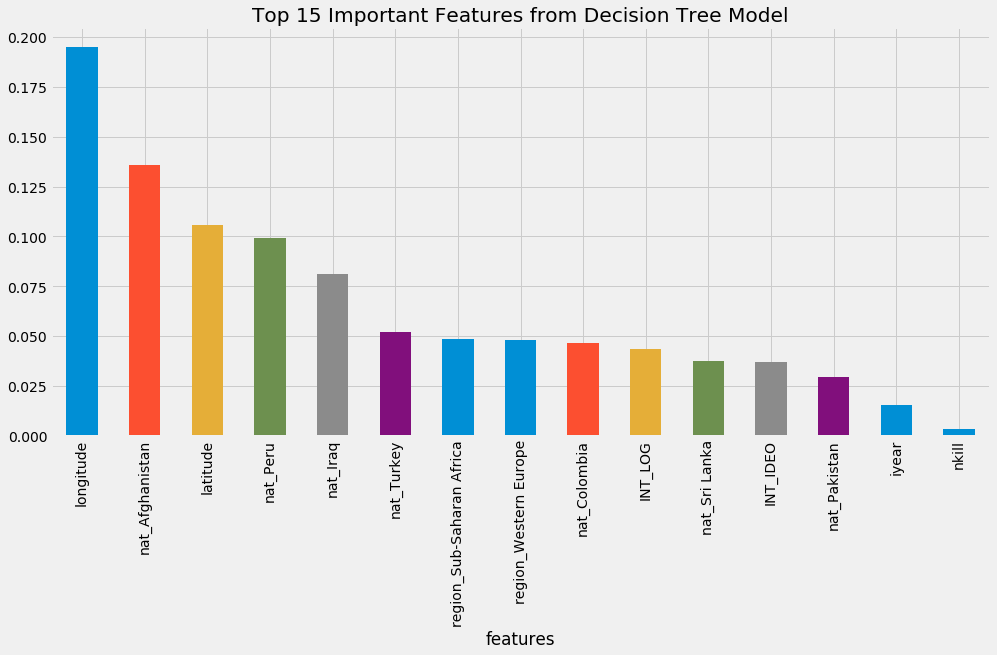

In [198]:
df_fi.sort_values(by="scores", ascending=False).iloc[:15, :].plot(kind="bar",x = "features", y= "scores", figsize = (15, 7),
                                                                 legend=False)
plt.title("Top 15 Important Features from Decision Tree Model");

Modeling with Random Forest and Gradient Boosting

In [199]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X, y)
rf.score(X, y)

0.9998045784477946

In [200]:
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.980569514237856

As expected the RF model does extremely well and only produces a slight discrepancy between the training and testing scores

In [202]:
gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(X_train, y_train)
gb.score(X_test, y_test)

0.9819095477386934

Parameter tuning the `n_estimators` parameter in the Random Forest Model.

In [203]:
params = {"n_estimators": list(range(10, 250, 10))}
grid = GridSearchCV(RandomForestClassifier(), param_grid=params, cv = 5, scoring="accuracy")

grid.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [204]:
grid.best_params_

{'n_estimators': 200}

This is the best CV accuracy score using the Random Forest model

In [205]:
grid.best_score_

0.9385259631490788

In [206]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

Examine the most important features as determined by the Random Forest model

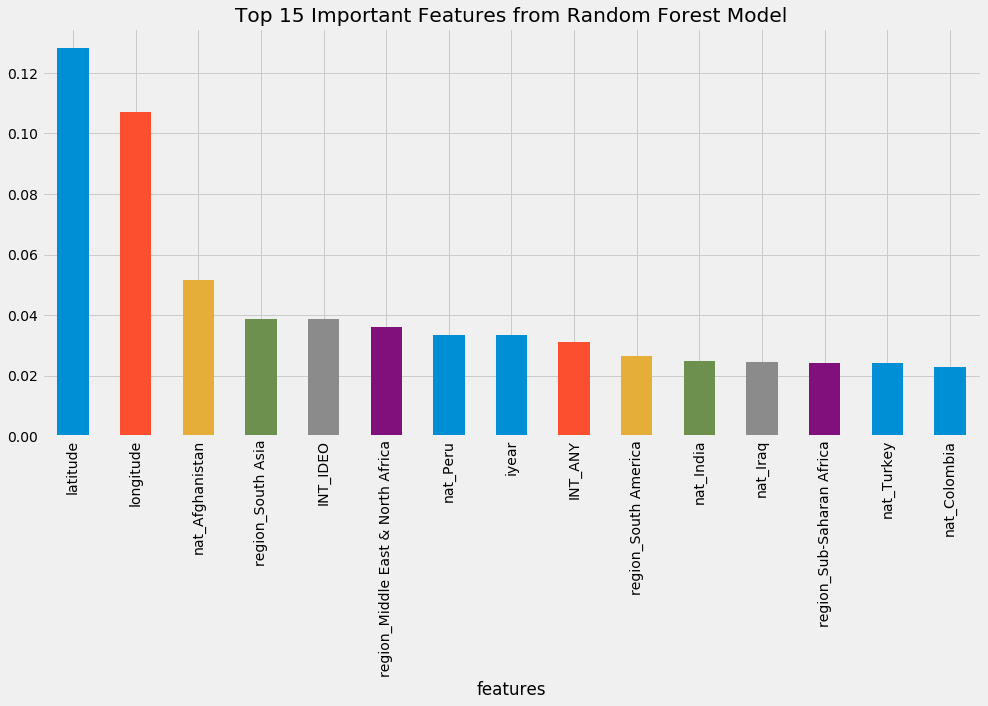

In [207]:
feat_imp = list(zip(X.columns, rf.feature_importances_))
df_fi = pd.DataFrame(feat_imp, columns=["features", "scores"])
df_fi.sort_values(by="scores", ascending=False).iloc[:15, :].plot(kind="bar",x = "features", y= "scores", figsize = (15, 7),
                                                                 legend=False)
plt.title("Top 15 Important Features from Random Forest Model");

In [208]:
rf.fit(X_train, y_train)
preds = rf.predict(X_test)

Make a confusion matrix of the predictions and labels of the testing set

In [209]:
#Confusion matrix
pd.crosstab(y_test, preds)

col_0,Al-Qaida in the Arabian Peninsula (AQAP),Al-Shabaab,Basque Fatherland and Freedom (ETA),Boko Haram,Communist Party of India - Maoist (CPI-Maoist),Houthi extremists (Ansar Allah),Irish Republican Army (IRA),Islamic State of Iraq and the Levant (ISIL),Kurdistan Workers' Party (PKK),Liberation Tigers of Tamil Eelam (LTTE),Manuel Rodriguez Patriotic Front (FPMR),Maoists,National Liberation Army of Colombia (ELN),New People's Army (NPA),Palestinians,Revolutionary Armed Forces of Colombia (FARC),Shining Path (SL),Sikh Extremists,Taliban,Tehrik-i-Taliban Pakistan (TTP)
gname,,,,,,,,,,,,,,,,,,,,
Al-Qaida in the Arabian Peninsula (AQAP),223,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Al-Shabaab,0,448,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Basque Fatherland and Freedom (ETA),0,0,428,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Boko Haram,0,1,0,373,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Communist Party of India - Maoist (CPI-Maoist),0,0,0,0,412,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Houthi extremists (Ansar Allah),2,0,0,0,0,159,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Irish Republican Army (IRA),0,0,0,0,0,0,403,0,0,0,0,0,0,0,0,0,0,0,0,0
Islamic State of Iraq and the Levant (ISIL),0,0,0,0,0,0,0,913,0,0,0,0,0,0,0,0,0,0,0,0
Kurdistan Workers' Party (PKK),0,0,0,0,0,0,0,4,462,0,0,0,0,0,1,0,0,0,0,0


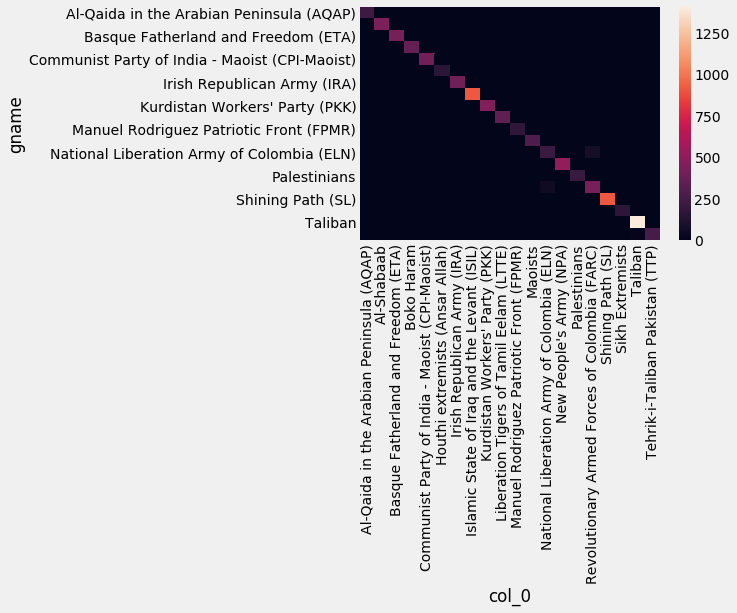

In [210]:
sns.heatmap(pd.crosstab(y_test, preds))

In [211]:
cm = pd.crosstab(y_test, preds)
cm.shape

(20, 20)

Derive the individual accuracy scores the model produces for each terrorist group

In [212]:
digit_accuracy_dict = {}


for col in cm.columns:
    tp = cm.loc[col, col]
    tn = cm.drop(col).drop(col, axis = 1).sum().sum()
    indices = [e for e in cm.columns if e != col]
    fp = cm.loc[indices, col].sum()
    fn = cm.loc[col, indices].sum()
    acc_score = (tp + tn)/float(tp + tn + fp + fn)
    digit_accuracy_dict[col] = acc_score
    
sorted(digit_accuracy_dict.items(), key= lambda x:x[1], reverse = True)

[('Communist Party of India - Maoist (CPI-Maoist)', 1.0),
 ('Irish Republican Army (IRA)', 1.0),
 ('Liberation Tigers of Tamil Eelam (LTTE)', 1.0),
 ('Sikh Extremists', 1.0),
 ('Al-Shabaab', 0.9998883305415969),
 ('Basque Fatherland and Freedom (ETA)', 0.9998883305415969),
 ('Boko Haram', 0.9998883305415969),
 ('Maoists', 0.9998883305415969),
 ('Houthi extremists (Ansar Allah)', 0.9997766610831937),
 ('Manuel Rodriguez Patriotic Front (FPMR)', 0.9997766610831937),
 ("New People's Army (NPA)", 0.9997766610831937),
 ('Palestinians', 0.9997766610831937),
 ('Shining Path (SL)', 0.9996649916247906),
 ('Al-Qaida in the Arabian Peninsula (AQAP)', 0.9995533221663875),
 ('Islamic State of Iraq and the Levant (ISIL)', 0.9993299832495812),
 ("Kurdistan Workers' Party (PKK)", 0.9993299832495812),
 ('Tehrik-i-Taliban Pakistan (TTP)', 0.9986599664991624),
 ('Taliban', 0.9985482970407593),
 ('National Liberation Army of Colombia (ELN)', 0.9844779452819654),
 ('Revolutionary Armed Forces of Colombia (

The random forest model can perfectly predict events of terror from the CPI-Maoist, IRA, and LTTE, and Sikh Extremists and like the logistic regression model, the two Colombian groups are last place

In [213]:
pred_df = pd.DataFrame(list(zip(y_test.values, preds)), columns=["actual", "predictions"])

In [214]:
d = {}
for i in pred_df.actual.unique():
    v = pred_df[pred_df.actual== i].predictions.value_counts().index[:2].tolist()
    for e in v:
        if e != i:
            d[i] = e

In [215]:
d

{'Al-Qaida in the Arabian Peninsula (AQAP)': 'Islamic State of Iraq and the Levant (ISIL)',
 'Boko Haram': 'Al-Shabaab',
 'Houthi extremists (Ansar Allah)': 'Al-Qaida in the Arabian Peninsula (AQAP)',
 "Kurdistan Workers' Party (PKK)": 'Islamic State of Iraq and the Levant (ISIL)',
 'Manuel Rodriguez Patriotic Front (FPMR)': 'Shining Path (SL)',
 'Maoists': "New People's Army (NPA)",
 'National Liberation Army of Colombia (ELN)': 'Revolutionary Armed Forces of Colombia (FARC)',
 "New People's Army (NPA)": 'Taliban',
 'Palestinians': "Kurdistan Workers' Party (PKK)",
 'Revolutionary Armed Forces of Colombia (FARC)': 'National Liberation Army of Colombia (ELN)',
 'Shining Path (SL)': 'Manuel Rodriguez Patriotic Front (FPMR)',
 'Tehrik-i-Taliban Pakistan (TTP)': 'Taliban'}

Dictionary represents the relationship between terrorist group and the most common group the model misidentifiies it as.

The overwhelming conclusion from this project is that location, as expressed in an array of features, is by far the most important feature in predicting which groups carry out terrorist attacks. If you examine the most important features from the tree based models and they all represent locations. A terrorist attack occurring in Iraq is never going to be the work of the FARC and an attack occuring in France is never going to be done by Boko Haram